# Assignment 2
Emilia Zielinska <br>
300018129 <br>
CSI 5341 <br>
Dr. Jochen Lang <br>
October 12, 2023

## Image Preprocessing

In [76]:
from pathlib import Path

In [77]:
# Generate lists of filenames for the needed images

directory_training_canvas = Path("./training/canvas1")
directory_training_cushion = Path("./training/cushion1")
directory_training_linsseeds = Path("./training/linsseeds1")
directory_training_sand = Path("./training/sand1")
directory_training_seat = Path("./training/seat2")
directory_training_stone = Path("./training/stone1")

file_list_training_canvas = [f for f in directory_training_canvas.glob('**/*') if f.is_file()]
file_list_training_cushion = [f for f in directory_training_cushion.glob('**/*') if f.is_file()]
file_list_training_linsseeds = [f for f in directory_training_linsseeds.glob('**/*') if f.is_file()]
file_list_training_sand = [f for f in directory_training_sand.glob('**/*') if f.is_file()]
file_list_training_seat = [f for f in directory_training_seat.glob('**/*') if f.is_file()]
file_list_training_stone = [f for f in directory_training_stone.glob('**/*') if f.is_file()]

In [78]:
from skimage import exposure
from skimage.filters import gaussian
from skimage.transform import pyramid_gaussian

In [79]:
# Function to preprocess an image
def preprocess(img):
    # Histogram equalization
    img = exposure.equalize_hist(img)
    # Gaussian smoothing
    img = gaussian(img)
    # Build an image pyramid for each image with 3 levels of downsampling by a factor of 2
    pyramid = tuple(pyramid_gaussian(img, max_layer=2, downscale=2))
    return pyramid

In [80]:
import matplotlib.pyplot as plt
import numpy as np

In [81]:
# A function to generate the composite image of a pyramid
# Code was taken from https://scikit-image.org/docs/stable/auto_examples/transform/plot_pyramid.html
def composite(img, pyramid):
    rows, cols = img.shape
    composite_rows = max(rows, sum(p.shape[0] for p in pyramid[1:]))
    composite_cols = cols + pyramid[1].shape[1]
    composite_image = np.zeros((composite_rows, composite_cols),
                               dtype=np.double)
    composite_image[:rows, :cols] = pyramid[0]
    i_row = 0
    for p in pyramid[1:]:
        n_rows, n_cols = p.shape[:2]
        composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
        i_row += n_rows
    fig, ax = plt.subplots()
    ax.imshow(composite_image)
    plt.show()

In [82]:
from skimage.io import imread

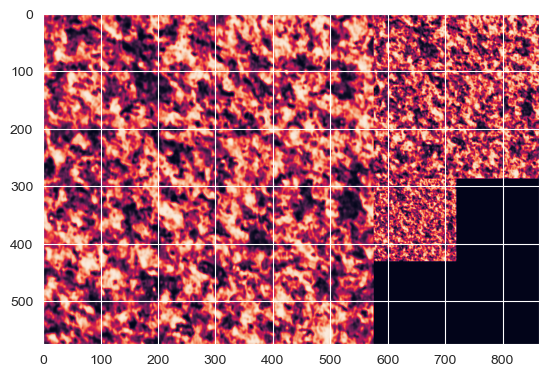

Sample pyramid shape: [(576, 576), (288, 288), (144, 144)]


In [83]:
pyramid_training_canvas = []
for f in file_list_training_canvas:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_canvas.append(pyramid)

pyramid_training_cushion = []
for f in file_list_training_cushion:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_cushion.append(pyramid)

pyramid_training_linsseeds = []
for f in file_list_training_linsseeds:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_linsseeds.append(pyramid)

pyramid_training_sand = []
for f in file_list_training_sand:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_sand.append(pyramid)

pyramid_training_seat = []
for f in file_list_training_seat:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_seat.append(pyramid)

pyramid_training_stone = []
for f in file_list_training_stone:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_stone.append(pyramid)
    
# Visualize one example in the notebook
composite(img, pyramid)
print("Sample pyramid shape: [" + str(pyramid[0].shape) + ", " + str(pyramid[1].shape) + ", " + str(pyramid[2].shape) + "]")

In [84]:
from skimage.exposure import histogram
from skimage.filters import sobel

In [85]:
sobel_training_canvas = []
histogram_training_canvas = []
for pyramid in pyramid_training_canvas:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_canvas.append(pyr)
    histogram_training_canvas.append(his)

sobel_training_cushion = []
histogram_training_cushion = []
for pyramid in pyramid_training_cushion:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_cushion.append(pyr)
    histogram_training_cushion.append(his)

sobel_training_linsseeds = []
histogram_training_linsseeds = []
for pyramid in pyramid_training_linsseeds:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_linsseeds.append(pyr)
    histogram_training_linsseeds.append(his)

sobel_training_sand = []
histogram_training_sand = []
for pyramid in pyramid_training_sand:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_sand.append(pyr)
    histogram_training_sand.append(his)

sobel_training_seat = []
histogram_training_seat = []
for pyramid in pyramid_training_seat:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_seat.append(pyr)
    histogram_training_seat.append(his)

sobel_training_stone = []
histogram_training_stone = []
for pyramid in pyramid_training_stone:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_stone.append(pyr)
    histogram_training_stone.append(his)

## Learning-Free Classification
### Single Level

In [86]:
# Function to average a list of histograms into one histogram
def average_histogram(hist):
    avg_h = []
    for i in range(256):
        hist_total = 0
        for pyramid in hist:
            h = pyramid[0][0]
            hist_total += h.item(i)
        hist_average = hist_total / len(hist)
        avg_h.append(hist_average)
    avg = np.asarray(avg_h)
    return avg

In [87]:
# Average all the histograms by category
average_histogram_training_canvas = average_histogram(histogram_training_canvas)
average_histogram_training_cushion = average_histogram(histogram_training_cushion)
average_histogram_training_linsseeds = average_histogram(histogram_training_linsseeds)
average_histogram_training_sand = average_histogram(histogram_training_sand)
average_histogram_training_seat = average_histogram(histogram_training_seat)
average_histogram_training_stone = average_histogram(histogram_training_stone)

In [88]:
import matplotlib.pyplot as plt

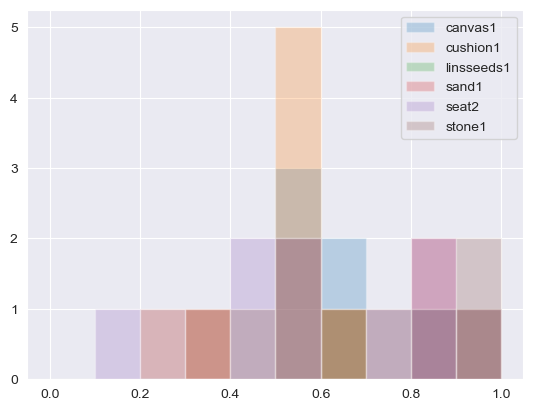

In [89]:
# Plot the histograms
plt.hist(average_histogram_training_canvas, label="canvas1", range=(0.0, 1.0), alpha=0.25)
plt.hist(average_histogram_training_cushion, label="cushion1", range=(0.0, 1.0), alpha=0.25)
plt.hist(average_histogram_training_linsseeds, label="linsseeds1", range=(0.0, 1.0), alpha=0.25)
plt.hist(average_histogram_training_sand, label="sand1", range=(0.0, 1.0), alpha=0.25)
plt.hist(average_histogram_training_seat, label="seat2", range=(0.0, 1.0), alpha=0.25)
plt.hist(average_histogram_training_stone, label="stone1", range=(0.0, 1.0), alpha=0.25)
plt.legend(loc='upper right')
plt.show()

In [90]:
# A function to measure the distance between a given image histogram and the histogram for each class
# It's assumed that the histogram is in the following format:
# list of size two - the first list being the histogram and the second list being the bins
# both items in the list should be ndarrays of size 256
# This function takes the absolute difference of each bucket in comparison to each average histogram
# Then it averages all the differences and returns the result
def histogram_distance(hist):
    diff_canvas = 0
    diff_cushion = 0
    diff_linsseeds = 0
    diff_sand = 0
    diff_seat = 0
    diff_stone = 0
    for i in range(256):
        diff_canvas += abs(hist[0].item(i) - average_histogram_training_canvas.item(i))
        diff_cushion += abs(hist[0].item(i) - average_histogram_training_cushion.item(i))
        diff_linsseeds += abs(hist[0].item(i) - average_histogram_training_linsseeds.item(i))
        diff_sand += abs(hist[0].item(i) - average_histogram_training_sand.item(i))
        diff_seat += abs(hist[0].item(i) - average_histogram_training_seat.item(i))
        diff_stone += abs(hist[0].item(i) - average_histogram_training_stone.item(i))
    diff_canvas /= 256
    diff_cushion /= 256
    diff_linsseeds /= 256
    diff_sand /= 256
    diff_seat /= 256
    diff_stone /= 256
    return diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone

In [91]:
# A function to classify an image based on the distance from the function above
# Distance should be as small as possible
def classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone):
    smallest = diff_canvas
    cls = 0
    if diff_cushion < smallest:
        smallest = diff_cushion
        cls = 1
    if diff_linsseeds < smallest:
        smallest = diff_linsseeds
        cls = 2
    if diff_sand < smallest:
        smallest = diff_sand
        cls = 3
    if diff_seat < smallest:
        smallest = diff_seat
        cls = 4
    if diff_stone < smallest:
        cls = 5
    return cls

In [92]:
# Get the testing files

directory_testing_canvas = Path("./testing/canvas1")
directory_testing_cushion = Path("./testing/cushion1")
directory_testing_linsseeds = Path("./testing/linsseeds1")
directory_testing_sand = Path("./testing/sand1")
directory_testing_seat = Path("./testing/seat2")
directory_testing_stone = Path("./testing/stone1")

file_list_testing_canvas = [f for f in directory_testing_canvas.glob('**/*') if f.is_file()]
file_list_testing_cushion = [f for f in directory_testing_cushion.glob('**/*') if f.is_file()]
file_list_testing_linsseeds = [f for f in directory_testing_linsseeds.glob('**/*') if f.is_file()]
file_list_testing_sand = [f for f in directory_testing_sand.glob('**/*') if f.is_file()]
file_list_testing_seat = [f for f in directory_testing_seat.glob('**/*') if f.is_file()]
file_list_testing_stone = [f for f in directory_testing_stone.glob('**/*') if f.is_file()]

In [93]:
confusion_matrix = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
]

for f in file_list_training_canvas:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[0][classification] += 1

for f in file_list_training_cushion:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[1][classification] += 1

for f in file_list_training_linsseeds:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[2][classification] += 1

for f in file_list_training_sand:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[3][classification] += 1

for f in file_list_training_seat:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[4][classification] += 1

for f in file_list_training_stone:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[5][classification] += 1

for f in file_list_testing_canvas:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[0][classification] += 1

for f in file_list_testing_cushion:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[1][classification] += 1

for f in file_list_testing_linsseeds:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[2][classification] += 1

for f in file_list_testing_sand:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[3][classification] += 1

for f in file_list_testing_seat:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[4][classification] += 1

for f in file_list_testing_stone:
    img = imread(f)
    img = img.astype(float)
    hist = histogram(img, nbins=256)
    diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone = histogram_distance(hist)
    classification = classify(diff_canvas, diff_cushion, diff_linsseeds, diff_sand, diff_seat, diff_stone)
    confusion_matrix[5][classification] += 1

In [94]:
# Multiclass accuracy = correct classifications / all classifications
accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[2][2] + confusion_matrix[3][3] + confusion_matrix[4][4] + confusion_matrix[5][5]) / 260 #hardcoding because I know the total and don't want to iterate over an array

# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
canvas_tp = confusion_matrix[0][0]
canvas_fp = confusion_matrix[1][0] + confusion_matrix[2][0] + confusion_matrix[3][0] + confusion_matrix[4][0] + confusion_matrix[5][0]
canvas_fn = confusion_matrix[0][1] + confusion_matrix[0][2] + confusion_matrix[0][3] + confusion_matrix[0][4] + confusion_matrix[0][5]
try:
    canvas_precision = canvas_tp / (canvas_tp + canvas_fp)
except:
    canvas_precision = 0
try:
    canvas_recall = canvas_tp / (canvas_tp + canvas_fn)
except:
    canvas_recall = 0

cushion_tp = confusion_matrix[1][1]
cushion_fp = confusion_matrix[0][1] + confusion_matrix[2][1] + confusion_matrix[3][1] + confusion_matrix[4][1] + confusion_matrix[5][1]
cushion_fn = confusion_matrix[1][0] + confusion_matrix[1][2] + confusion_matrix[1][3] + confusion_matrix[1][4] + confusion_matrix[1][5]
try:
    cushion_precision = cushion_tp / (cushion_tp + cushion_fp)
except:
    cushion_precision = 0
try:
    cushion_recall = cushion_tp / (cushion_tp + cushion_fn)
except:
    cushion_recall = 0

linsseeds_tp = confusion_matrix[2][2]
linsseeds_fp = confusion_matrix[1][2] + confusion_matrix[0][2] + confusion_matrix[3][2] + confusion_matrix[4][2] + confusion_matrix[5][2]
linsseeds_fn = confusion_matrix[2][1] + confusion_matrix[2][0] + confusion_matrix[2][3] + confusion_matrix[2][4] + confusion_matrix[2][5]
try:
    linsseeds_precision = linsseeds_tp / (linsseeds_tp + linsseeds_fp)
except:
    linsseeds_precision = 0
try:
    linsseeds_recall = linsseeds_tp / (linsseeds_tp + linsseeds_fn)
except:
    linsseeds_recall = 0

sand_tp = confusion_matrix[3][3]
sand_fp = confusion_matrix[1][3] + confusion_matrix[2][3] + confusion_matrix[0][3] + confusion_matrix[4][3] + confusion_matrix[5][3]
sand_fn = confusion_matrix[3][1] + confusion_matrix[3][2] + confusion_matrix[3][0] + confusion_matrix[3][4] + confusion_matrix[3][5]
try:
    sand_precision = sand_tp / (sand_tp + sand_fp)
except:
    sand_precision = 0
try:
    sand_recall = sand_tp / (sand_tp + sand_fn)
except:
    sand_recall = 0

seat_tp = confusion_matrix[4][4]
seat_fp = confusion_matrix[1][4] + confusion_matrix[2][4] + confusion_matrix[3][4] + confusion_matrix[0][4] + confusion_matrix[5][4]
seat_fn = confusion_matrix[4][1] + confusion_matrix[4][2] + confusion_matrix[4][3] + confusion_matrix[4][0] + confusion_matrix[4][5]
try:
    seat_precision = seat_tp / (seat_tp + seat_fp)
except:
    seat_precision = 0
try:
    seat_recall = seat_tp / (seat_tp + canvas_fn)
except:
    seat_recall = 0

stone_tp = confusion_matrix[5][5]
stone_fp = confusion_matrix[1][5] + confusion_matrix[2][5] + confusion_matrix[3][5] + confusion_matrix[4][5] + confusion_matrix[0][5]
stone_fn = confusion_matrix[5][1] + confusion_matrix[5][2] + confusion_matrix[5][3] + confusion_matrix[5][4] + confusion_matrix[5][0]
try:
    stone_precision = stone_tp / (stone_tp + stone_fp)
except:
    stone_precision = 0
try:
    stone_recall = stone_tp / (stone_tp + stone_fn)
except:
    stone_recall = 0

print("Accuracy: " + str(accuracy))
print("Canvas precision: " + str(canvas_precision) + " | Canvas recall: " + str(canvas_recall))
print("Cushion precision: " + str(cushion_precision) + " | Canvas recall: " + str(cushion_recall))
print("Linsseeds precision: " + str(linsseeds_precision) + " | Canvas recall: " + str(linsseeds_recall))
print("Sand precision: " + str(sand_precision) + " | Canvas recall: " + str(sand_recall))
print("Seat precision: " + str(seat_precision) + " | Canvas recall: " + str(seat_recall))
print("Stone precision: " + str(stone_precision) + " | Canvas recall: " + str(stone_recall))

Accuracy: 0.15384615384615385
Canvas precision: 0.17094017094017094 | Canvas recall: 1.0
Cushion precision: 0 | Canvas recall: 0.0
Linsseeds precision: 0 | Canvas recall: 0.0
Sand precision: 0 | Canvas recall: 0.0
Seat precision: 0.0 | Canvas recall: 0
Stone precision: 0 | Canvas recall: 0.0


In [95]:
from skimage.io import imshow

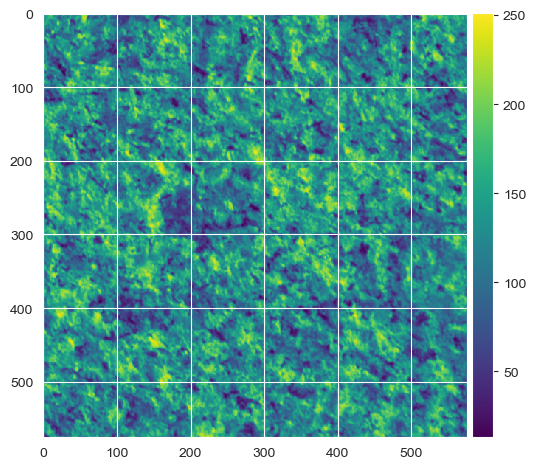

In [96]:
imshow(img)

This method of classifying images by comparison to the averaged histograms is a horrible method. As we can see, it is only accurate 15% of the time. Looking at the confusion matrix, the precision, and the recall, we can see that the method classifies nearly all the images as "Canvas". Interestingly, it classified six images as "Seat", but all six of those images were cushions.

In the merged graph with all the histograms, we can see that they're mostly similar, which is why it could be getting the classes confused. Histograms are clearly not a good way to differentiate between textures.

The visualized image above is from the "Stone" class, wrongly misclassified as "Canvas". 